In [16]:
import csv
from rdkit import Chem

with open("pampa_qsar_model.csv", "r") as f:
    reader = csv.reader(f)
    h = next(reader)
    smiles = []
    mols = []
    activity = []
    for r in reader:
        smi = r[0]
        mol = Chem.MolFromSmiles(smi)
        if mol is None:
            continue
        smiles += [r[0]]
        mols += [mol]
        activity += [float(r[1])]



RDKit ERROR: [08:47:19] Can't kekulize mol.  Unkekulized atoms: 2 3 6 8 9
RDKit ERROR: 
RDKit ERROR: [08:47:19] Explicit valence for atom # 14 N, 4, is greater than permitted
RDKit ERROR: [08:47:19] Explicit valence for atom # 9 N, 4, is greater than permitted
RDKit ERROR: [08:47:19] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [08:47:19] Explicit valence for atom # 9 N, 4, is greater than permitted
RDKit ERROR: [08:47:19] Explicit valence for atom # 10 N, 4, is greater than permitted
RDKit ERROR: [08:47:19] Can't kekulize mol.  Unkekulized atoms: 20 22 23 24 25
RDKit ERROR: 


In [51]:
from rdkit import Chem
from mordred import Calculator, descriptors


calc = Calculator(descriptors, ignore_3D=True)

X = np.array(calc.pandas(mols), dtype=np.float32)


100%|██████████| 183/183 [00:26<00:00,  6.88it/s]


In [56]:
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer

mask = np.logical_and(~np.isnan(X), X < -9e+12)
X[mask] = np.nan
mask = np.logical_and(~np.isnan(X), X > 9e+12)
X[mask] = np.nan

imputer = SimpleImputer(strategy="median")
scaler = RobustScaler()


In [58]:
imputer.fit(X)
X = imputer.transform(X)



In [59]:
scaler.fit(X)
X = scaler.transform(X)

In [62]:
from flaml import AutoML

In [68]:
time_budget = 60
automl_settings = {
    "time_budget": int(time_budget)*60,
    "metric": "auto",
    "task": "regression",
    "log_file_name": "automl.log",
    "verbose": 3
}

mdl = AutoML()
mdl.fit(X_train=X, y_train=y, **automl_settings)

[flaml.automl: 11-10 09:29:42] {1432} INFO - Evaluation method: cv
[flaml.automl: 11-10 09:29:42] {1478} INFO - Minimizing error metric: 1-r2
[flaml.automl: 11-10 09:29:42] {1515} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'catboost', 'xgboost', 'extra_tree']
[flaml.automl: 11-10 09:29:42] {1748} INFO - iteration 0, current learner lgbm
[flaml.tune.tune: 11-10 09:29:42] {383} INFO - trial 1 config: {'n_estimators': 4, 'num_leaves': 4, 'min_child_samples': 20, 'learning_rate': 0.09999999999999995, 'log_max_bin': 8, 'colsample_bytree': 1.0, 'reg_alpha': 0.0009765625, 'reg_lambda': 1.0}
[flaml.automl: 11-10 09:30:26] {1866} INFO - Estimated sufficient time budget=437763s. Estimated necessary time budget=941s.
[flaml.automl: 11-10 09:30:26] {1944} INFO -  at 44.0s,	estimator lgbm's best error=0.7147,	best estimator lgbm's best error=0.7147
[flaml.automl: 11-10 09:30:26] {1748} INFO - iteration 1, current learner lgbm
[flaml.tune.tune: 11-10 09:30:26] {383} INFO - trial 1 conf

[flaml.automl: 11-10 09:37:19] {1944} INFO -  at 456.8s,	estimator extra_tree's best error=0.4516,	best estimator extra_tree's best error=0.4516
[flaml.automl: 11-10 09:37:19] {1748} INFO - iteration 16, current learner extra_tree
[flaml.tune.tune: 11-10 09:37:19] {383} INFO - trial 1 config: {'n_estimators': 4, 'max_features': 1.0, 'max_leaves': 5}
[flaml.automl: 11-10 09:37:20] {1944} INFO -  at 458.0s,	estimator extra_tree's best error=0.4516,	best estimator extra_tree's best error=0.4516
[flaml.automl: 11-10 09:37:20] {1748} INFO - iteration 17, current learner extra_tree
[flaml.tune.tune: 11-10 09:37:20] {383} INFO - trial 1 config: {'n_estimators': 6, 'max_features': 0.8399648851658329, 'max_leaves': 13}
[flaml.automl: 11-10 09:37:22] {1944} INFO -  at 459.4s,	estimator extra_tree's best error=0.4501,	best estimator extra_tree's best error=0.4501
[flaml.automl: 11-10 09:37:22] {1748} INFO - iteration 18, current learner extra_tree
[flaml.tune.tune: 11-10 09:37:22] {383} INFO - tr

[flaml.automl: 11-10 09:37:48] {1748} INFO - iteration 38, current learner extra_tree
[flaml.tune.tune: 11-10 09:37:48] {383} INFO - trial 1 config: {'n_estimators': 7, 'max_features': 0.9060932800609619, 'max_leaves': 12}
[flaml.automl: 11-10 09:37:50] {1944} INFO -  at 487.5s,	estimator extra_tree's best error=0.4025,	best estimator extra_tree's best error=0.4025
[flaml.automl: 11-10 09:37:50] {1748} INFO - iteration 39, current learner extra_tree
[flaml.tune.tune: 11-10 09:37:50] {383} INFO - trial 1 config: {'n_estimators': 7, 'max_features': 0.5083767531931918, 'max_leaves': 10}
[flaml.automl: 11-10 09:37:51] {1944} INFO -  at 488.9s,	estimator extra_tree's best error=0.4019,	best estimator extra_tree's best error=0.4019
[flaml.automl: 11-10 09:37:51] {1748} INFO - iteration 40, current learner extra_tree
[flaml.tune.tune: 11-10 09:37:51] {383} INFO - trial 1 config: {'n_estimators': 9, 'max_features': 0.6239036131509452, 'max_leaves': 13}
[flaml.automl: 11-10 09:37:52] {1944} INF

[flaml.automl: 11-10 09:39:03] {1944} INFO -  at 560.7s,	estimator xgboost's best error=0.5923,	best estimator extra_tree's best error=0.3823
[flaml.automl: 11-10 09:39:03] {1748} INFO - iteration 59, current learner extra_tree
[flaml.tune.tune: 11-10 09:39:03] {383} INFO - trial 1 config: {'n_estimators': 8, 'max_features': 0.4526753687037502, 'max_leaves': 20}
[flaml.automl: 11-10 09:39:04] {1944} INFO -  at 562.0s,	estimator extra_tree's best error=0.3823,	best estimator extra_tree's best error=0.3823
[flaml.automl: 11-10 09:39:04] {1748} INFO - iteration 60, current learner extra_tree
[flaml.tune.tune: 11-10 09:39:04] {383} INFO - trial 1 config: {'n_estimators': 10, 'max_features': 0.5361526597058931, 'max_leaves': 10}
[flaml.automl: 11-10 09:39:06] {1944} INFO -  at 563.3s,	estimator extra_tree's best error=0.3823,	best estimator extra_tree's best error=0.3823
[flaml.automl: 11-10 09:39:06] {1748} INFO - iteration 61, current learner extra_tree
[flaml.tune.tune: 11-10 09:39:06] {

[flaml.automl: 11-10 09:39:44] {1944} INFO -  at 602.0s,	estimator extra_tree's best error=0.3720,	best estimator extra_tree's best error=0.3720
[flaml.automl: 11-10 09:39:44] {1748} INFO - iteration 81, current learner extra_tree
[flaml.tune.tune: 11-10 09:39:44] {383} INFO - trial 1 config: {'n_estimators': 9, 'max_features': 0.4888229659875341, 'max_leaves': 21}
[flaml.automl: 11-10 09:39:46] {1944} INFO -  at 603.3s,	estimator extra_tree's best error=0.3720,	best estimator extra_tree's best error=0.3720
[flaml.automl: 11-10 09:39:46] {1748} INFO - iteration 82, current learner extra_tree
[flaml.tune.tune: 11-10 09:39:46] {383} INFO - trial 1 config: {'n_estimators': 12, 'max_features': 0.5884892274431056, 'max_leaves': 19}
[flaml.automl: 11-10 09:39:47] {1944} INFO -  at 604.7s,	estimator extra_tree's best error=0.3720,	best estimator extra_tree's best error=0.3720
[flaml.automl: 11-10 09:39:47] {1748} INFO - iteration 83, current learner extra_tree
[flaml.tune.tune: 11-10 09:39:47

[flaml.automl: 11-10 09:41:07] {1944} INFO -  at 685.2s,	estimator extra_tree's best error=0.3720,	best estimator extra_tree's best error=0.3720
[flaml.automl: 11-10 09:41:07] {1748} INFO - iteration 103, current learner extra_tree
[flaml.tune.tune: 11-10 09:41:07] {383} INFO - trial 1 config: {'n_estimators': 10, 'max_features': 0.49864286566099336, 'max_leaves': 21}
[flaml.automl: 11-10 09:41:09] {1944} INFO -  at 686.6s,	estimator extra_tree's best error=0.3589,	best estimator extra_tree's best error=0.3589
[flaml.automl: 11-10 09:41:09] {1748} INFO - iteration 104, current learner extra_tree
[flaml.tune.tune: 11-10 09:41:09] {383} INFO - trial 1 config: {'n_estimators': 13, 'max_features': 0.5001363422326477, 'max_leaves': 23}
[flaml.automl: 11-10 09:41:10] {1944} INFO -  at 687.9s,	estimator extra_tree's best error=0.3589,	best estimator extra_tree's best error=0.3589
[flaml.automl: 11-10 09:41:10] {1748} INFO - iteration 105, current learner extra_tree
[flaml.tune.tune: 11-10 09:

[flaml.automl: 11-10 09:42:28] {1944} INFO -  at 765.8s,	estimator xgboost's best error=0.5923,	best estimator extra_tree's best error=0.3589
[flaml.automl: 11-10 09:42:28] {1748} INFO - iteration 124, current learner xgboost
[flaml.tune.tune: 11-10 09:42:28] {383} INFO - trial 1 config: {'n_estimators': 4, 'max_leaves': 4, 'min_child_weight': 4.091039054698483, 'learning_rate': 0.3180244945346128, 'subsample': 0.7960542272265719, 'colsample_bylevel': 1.0, 'colsample_bytree': 0.8951942509921886, 'reg_alpha': 0.001366885780901807, 'reg_lambda': 1.2221424653312587}
[flaml.automl: 11-10 09:42:38] {1944} INFO -  at 775.9s,	estimator xgboost's best error=0.5923,	best estimator extra_tree's best error=0.3589
[flaml.automl: 11-10 09:42:38] {1748} INFO - iteration 125, current learner xgboost
[flaml.tune.tune: 11-10 09:42:38] {383} INFO - trial 1 config: {'n_estimators': 5, 'max_leaves': 5, 'min_child_weight': 0.08432894223709418, 'learning_rate': 0.8849381500993652, 'subsample': 0.83050986730

[flaml.tune.tune: 11-10 09:43:33] {383} INFO - trial 1 config: {'n_estimators': 13, 'max_features': 0.4796690223646204, 'max_leaves': 23}
[flaml.automl: 11-10 09:43:34] {1944} INFO -  at 832.0s,	estimator extra_tree's best error=0.3589,	best estimator extra_tree's best error=0.3589
[flaml.automl: 11-10 09:43:34] {1748} INFO - iteration 145, current learner xgboost
[flaml.tune.tune: 11-10 09:43:34] {383} INFO - trial 1 config: {'n_estimators': 6, 'max_leaves': 6, 'min_child_weight': 0.4300722028979565, 'learning_rate': 0.16541217021820587, 'subsample': 0.7028409219308298, 'colsample_bylevel': 0.6661730303092916, 'colsample_bytree': 0.7765568880293273, 'reg_alpha': 0.0038476036905626563, 'reg_lambda': 0.2580167790436494}
[flaml.automl: 11-10 09:44:03] {1944} INFO -  at 860.9s,	estimator xgboost's best error=0.5923,	best estimator extra_tree's best error=0.3589
[flaml.automl: 11-10 09:44:03] {1748} INFO - iteration 146, current learner extra_tree
[flaml.tune.tune: 11-10 09:44:03] {383} IN

[flaml.automl: 11-10 09:45:42] {1748} INFO - iteration 165, current learner extra_tree
[flaml.tune.tune: 11-10 09:45:42] {383} INFO - trial 1 config: {'n_estimators': 8, 'max_features': 0.4726278755040723, 'max_leaves': 22}
[flaml.automl: 11-10 09:45:43] {1944} INFO -  at 960.6s,	estimator extra_tree's best error=0.3589,	best estimator extra_tree's best error=0.3589
[flaml.automl: 11-10 09:45:43] {1748} INFO - iteration 166, current learner extra_tree
[flaml.tune.tune: 11-10 09:45:43] {383} INFO - trial 1 config: {'n_estimators': 9, 'max_features': 0.5646380226343743, 'max_leaves': 22}
[flaml.automl: 11-10 09:45:44] {1944} INFO -  at 961.9s,	estimator extra_tree's best error=0.3589,	best estimator extra_tree's best error=0.3589
[flaml.automl: 11-10 09:45:44] {1748} INFO - iteration 167, current learner extra_tree
[flaml.tune.tune: 11-10 09:45:44] {383} INFO - trial 1 config: {'n_estimators': 11, 'max_features': 0.44036125359488026, 'max_leaves': 20}
[flaml.automl: 11-10 09:45:45] {1944

[flaml.automl: 11-10 09:46:47] {1944} INFO -  at 1024.9s,	estimator rf's best error=0.4209,	best estimator extra_tree's best error=0.3589
[flaml.automl: 11-10 09:46:47] {1748} INFO - iteration 187, current learner rf
[flaml.tune.tune: 11-10 09:46:47] {383} INFO - trial 1 config: {'n_estimators': 4, 'max_features': 1.0, 'max_leaves': 6}
[flaml.automl: 11-10 09:46:49] {1944} INFO -  at 1026.3s,	estimator rf's best error=0.4209,	best estimator extra_tree's best error=0.3589
[flaml.automl: 11-10 09:46:49] {1748} INFO - iteration 188, current learner rf
[flaml.tune.tune: 11-10 09:46:49] {383} INFO - trial 1 config: {'n_estimators': 4, 'max_features': 1.0, 'max_leaves': 9}
[flaml.automl: 11-10 09:46:50] {1944} INFO -  at 1027.9s,	estimator rf's best error=0.4209,	best estimator extra_tree's best error=0.3589
[flaml.automl: 11-10 09:46:50] {1748} INFO - iteration 189, current learner extra_tree
[flaml.tune.tune: 11-10 09:46:50] {383} INFO - trial 1 config: {'n_estimators': 12, 'max_features':

[flaml.automl: 11-10 09:47:23] {1748} INFO - iteration 209, current learner rf
[flaml.tune.tune: 11-10 09:47:23] {383} INFO - trial 1 config: {'n_estimators': 4, 'max_features': 1.0, 'max_leaves': 7}
[flaml.automl: 11-10 09:47:24] {1944} INFO -  at 1062.0s,	estimator rf's best error=0.4209,	best estimator extra_tree's best error=0.3589
[flaml.automl: 11-10 09:47:24] {1748} INFO - iteration 210, current learner extra_tree
[flaml.tune.tune: 11-10 09:47:24] {383} INFO - trial 1 config: {'n_estimators': 8, 'max_features': 0.49080890985614345, 'max_leaves': 21}
[flaml.automl: 11-10 09:47:25] {1944} INFO -  at 1063.3s,	estimator extra_tree's best error=0.3589,	best estimator extra_tree's best error=0.3589
[flaml.automl: 11-10 09:47:25] {1748} INFO - iteration 211, current learner xgboost
[flaml.tune.tune: 11-10 09:47:25] {383} INFO - trial 1 config: {'n_estimators': 4, 'max_leaves': 6, 'min_child_weight': 0.19054735444518056, 'learning_rate': 0.2628747400377236, 'subsample': 0.87163804810579

[flaml.automl: 11-10 09:48:20] {1944} INFO -  at 1118.0s,	estimator extra_tree's best error=0.3589,	best estimator extra_tree's best error=0.3589
[flaml.automl: 11-10 09:48:20] {1748} INFO - iteration 231, current learner extra_tree
[flaml.tune.tune: 11-10 09:48:20] {383} INFO - trial 1 config: {'n_estimators': 9, 'max_features': 0.5252410356634377, 'max_leaves': 18}
[flaml.automl: 11-10 09:48:21] {1944} INFO -  at 1119.3s,	estimator extra_tree's best error=0.3589,	best estimator extra_tree's best error=0.3589
[flaml.automl: 11-10 09:48:21] {1748} INFO - iteration 232, current learner extra_tree
[flaml.tune.tune: 11-10 09:48:21] {383} INFO - trial 1 config: {'n_estimators': 11, 'max_features': 0.4733916251622298, 'max_leaves': 25}
[flaml.automl: 11-10 09:48:23] {1944} INFO -  at 1120.7s,	estimator extra_tree's best error=0.3589,	best estimator extra_tree's best error=0.3589
[flaml.automl: 11-10 09:48:23] {1748} INFO - iteration 233, current learner extra_tree
[flaml.tune.tune: 11-10 09

[flaml.automl: 11-10 09:49:01] {1944} INFO -  at 1158.9s,	estimator extra_tree's best error=0.3589,	best estimator extra_tree's best error=0.3589
[flaml.automl: 11-10 09:49:01] {1748} INFO - iteration 253, current learner extra_tree
[flaml.tune.tune: 11-10 09:49:01] {383} INFO - trial 1 config: {'n_estimators': 11, 'max_features': 0.5391589431886533, 'max_leaves': 24}
[flaml.automl: 11-10 09:49:02] {1944} INFO -  at 1160.3s,	estimator extra_tree's best error=0.3589,	best estimator extra_tree's best error=0.3589
[flaml.automl: 11-10 09:49:02] {1748} INFO - iteration 254, current learner lgbm
[flaml.tune.tune: 11-10 09:49:02] {383} INFO - trial 1 config: {'n_estimators': 7, 'num_leaves': 4, 'min_child_samples': 7, 'learning_rate': 0.2798674441105101, 'log_max_bin': 6, 'colsample_bytree': 0.9019070144825116, 'reg_alpha': 0.0009765625, 'reg_lambda': 0.09189114905095784}
[flaml.automl: 11-10 09:50:28] {1944} INFO -  at 1246.0s,	estimator lgbm's best error=0.4229,	best estimator extra_tree's

[flaml.automl: 11-10 09:52:45] {1944} INFO -  at 1382.6s,	estimator xgboost's best error=0.4899,	best estimator extra_tree's best error=0.3589
[flaml.automl: 11-10 09:52:45] {1748} INFO - iteration 274, current learner xgboost
[flaml.tune.tune: 11-10 09:52:45] {383} INFO - trial 1 config: {'n_estimators': 8, 'max_leaves': 7, 'min_child_weight': 1.8349491523532644, 'learning_rate': 1.0, 'subsample': 0.7180884813408981, 'colsample_bylevel': 1.0, 'colsample_bytree': 0.7826280834197678, 'reg_alpha': 0.016902141428150032, 'reg_lambda': 1.6384074830698825}
[flaml.automl: 11-10 09:53:24] {1944} INFO -  at 1422.2s,	estimator xgboost's best error=0.4899,	best estimator extra_tree's best error=0.3589
[flaml.automl: 11-10 09:53:24] {1748} INFO - iteration 275, current learner xgboost
[flaml.tune.tune: 11-10 09:53:24] {383} INFO - trial 1 config: {'n_estimators': 4, 'max_leaves': 6, 'min_child_weight': 0.30361378984106985, 'learning_rate': 1.0, 'subsample': 0.7617775880125269, 'colsample_bylevel':

[flaml.automl: 11-10 10:01:10] {1748} INFO - iteration 292, current learner rf
[flaml.tune.tune: 11-10 10:01:10] {383} INFO - trial 1 config: {'n_estimators': 5, 'max_leaves': 5, 'max_features': 0.5973382761062345}
[flaml.automl: 11-10 10:01:11] {1944} INFO -  at 1889.1s,	estimator rf's best error=0.4006,	best estimator extra_tree's best error=0.3589
[flaml.automl: 11-10 10:01:11] {1748} INFO - iteration 293, current learner rf
[flaml.tune.tune: 11-10 10:01:11] {383} INFO - trial 1 config: {'n_estimators': 7, 'max_leaves': 5, 'max_features': 0.36209344775011365}
[flaml.automl: 11-10 10:01:13] {1944} INFO -  at 1890.3s,	estimator rf's best error=0.4006,	best estimator extra_tree's best error=0.3589
[flaml.automl: 11-10 10:01:13] {1748} INFO - iteration 294, current learner rf
[flaml.tune.tune: 11-10 10:01:13] {383} INFO - trial 1 config: {'n_estimators': 7, 'max_leaves': 5, 'max_features': 0.6487620913724865}
[flaml.automl: 11-10 10:01:14] {1944} INFO -  at 1891.7s,	estimator rf's best 

[flaml.automl: 11-10 10:03:56] {1944} INFO -  at 2053.8s,	estimator extra_tree's best error=0.3589,	best estimator extra_tree's best error=0.3589
[flaml.automl: 11-10 10:03:56] {1748} INFO - iteration 315, current learner extra_tree
[flaml.tune.tune: 11-10 10:03:56] {383} INFO - trial 1 config: {'n_estimators': 9, 'max_features': 0.5084723054059251, 'max_leaves': 18}
[flaml.automl: 11-10 10:03:57] {1944} INFO -  at 2055.1s,	estimator extra_tree's best error=0.3589,	best estimator extra_tree's best error=0.3589
[flaml.automl: 11-10 10:03:57] {1748} INFO - iteration 316, current learner rf
[flaml.tune.tune: 11-10 10:03:57] {383} INFO - trial 1 config: {'n_estimators': 7, 'max_leaves': 5, 'max_features': 0.48467773049175444}
[flaml.automl: 11-10 10:03:59] {1944} INFO -  at 2056.4s,	estimator rf's best error=0.3887,	best estimator extra_tree's best error=0.3589
[flaml.automl: 11-10 10:03:59] {1748} INFO - iteration 317, current learner rf
[flaml.tune.tune: 11-10 10:03:59] {383} INFO - tria

[flaml.automl: 11-10 10:04:28] {1748} INFO - iteration 338, current learner extra_tree
[flaml.tune.tune: 11-10 10:04:28] {383} INFO - trial 1 config: {'n_estimators': 11, 'max_features': 0.5362928936830158, 'max_leaves': 20}
[flaml.automl: 11-10 10:04:29] {1944} INFO -  at 2086.7s,	estimator extra_tree's best error=0.3589,	best estimator extra_tree's best error=0.3589
[flaml.automl: 11-10 10:04:29] {1748} INFO - iteration 339, current learner lgbm
[flaml.tune.tune: 11-10 10:04:29] {383} INFO - trial 1 config: {'n_estimators': 8, 'num_leaves': 4, 'min_child_samples': 6, 'learning_rate': 1.0, 'log_max_bin': 7, 'colsample_bytree': 0.8383701415203663, 'reg_alpha': 0.0009765625, 'reg_lambda': 0.017463343726355537}
[flaml.automl: 11-10 10:06:05] {1944} INFO -  at 2183.2s,	estimator lgbm's best error=0.4229,	best estimator extra_tree's best error=0.3589
[flaml.automl: 11-10 10:06:05] {1748} INFO - iteration 340, current learner rf
[flaml.tune.tune: 11-10 10:06:05] {383} INFO - trial 1 config:

[flaml.automl: 11-10 10:09:19] {1944} INFO -  at 2376.4s,	estimator xgboost's best error=0.4306,	best estimator extra_tree's best error=0.3589
[flaml.automl: 11-10 10:09:19] {1748} INFO - iteration 359, current learner rf
[flaml.tune.tune: 11-10 10:09:19] {383} INFO - trial 1 config: {'n_estimators': 8, 'max_leaves': 4, 'max_features': 0.5908295666476179}
[flaml.automl: 11-10 10:09:20] {1944} INFO -  at 2377.7s,	estimator rf's best error=0.3767,	best estimator extra_tree's best error=0.3589
[flaml.automl: 11-10 10:09:20] {1748} INFO - iteration 360, current learner extra_tree
[flaml.tune.tune: 11-10 10:09:20] {383} INFO - trial 1 config: {'n_estimators': 11, 'max_features': 0.5431482881336149, 'max_leaves': 21}
[flaml.automl: 11-10 10:09:21] {1944} INFO -  at 2379.0s,	estimator extra_tree's best error=0.3589,	best estimator extra_tree's best error=0.3589
[flaml.automl: 11-10 10:09:21] {1748} INFO - iteration 361, current learner rf
[flaml.tune.tune: 11-10 10:09:21] {383} INFO - trial 1

[flaml.automl: 11-10 10:14:23] {1748} INFO - iteration 380, current learner extra_tree
[flaml.tune.tune: 11-10 10:14:23] {383} INFO - trial 1 config: {'n_estimators': 11, 'max_features': 0.5426044649837108, 'max_leaves': 19}
[flaml.automl: 11-10 10:14:24] {1944} INFO -  at 2682.2s,	estimator extra_tree's best error=0.3589,	best estimator extra_tree's best error=0.3589
[flaml.automl: 11-10 10:14:24] {1748} INFO - iteration 381, current learner extra_tree
[flaml.tune.tune: 11-10 10:14:24] {383} INFO - trial 1 config: {'n_estimators': 9, 'max_features': 0.4582430177423474, 'max_leaves': 23}
[flaml.automl: 11-10 10:14:26] {1944} INFO -  at 2683.5s,	estimator extra_tree's best error=0.3589,	best estimator extra_tree's best error=0.3589
[flaml.automl: 11-10 10:14:26] {1748} INFO - iteration 382, current learner extra_tree
[flaml.tune.tune: 11-10 10:14:26] {383} INFO - trial 1 config: {'n_estimators': 12, 'max_features': 0.4859692478291501, 'max_leaves': 20}
[flaml.automl: 11-10 10:14:27] {19

[flaml.automl: 11-10 10:19:23] {1944} INFO -  at 2981.3s,	estimator rf's best error=0.3767,	best estimator extra_tree's best error=0.3589
[flaml.automl: 11-10 10:19:23] {1748} INFO - iteration 401, current learner extra_tree
[flaml.tune.tune: 11-10 10:19:23] {383} INFO - trial 1 config: {'n_estimators': 12, 'max_features': 0.5214944232030093, 'max_leaves': 22}
[flaml.automl: 11-10 10:19:25] {1944} INFO -  at 2982.6s,	estimator extra_tree's best error=0.3589,	best estimator extra_tree's best error=0.3589
[flaml.automl: 11-10 10:19:25] {1748} INFO - iteration 402, current learner xgboost
[flaml.tune.tune: 11-10 10:19:25] {383} INFO - trial 1 config: {'n_estimators': 25, 'max_leaves': 6, 'min_child_weight': 7.610933181962434, 'learning_rate': 0.09772347731064568, 'subsample': 1.0, 'colsample_bylevel': 0.9284803748670097, 'colsample_bytree': 0.7354430789270009, 'reg_alpha': 0.0009765625, 'reg_lambda': 0.3488676476940141}
[flaml.automl: 11-10 10:21:26] {1944} INFO -  at 3103.9s,	estimator x

[flaml.automl: 11-10 10:23:56] {1944} INFO -  at 3253.4s,	estimator rf's best error=0.3767,	best estimator extra_tree's best error=0.3589
[flaml.automl: 11-10 10:23:56] {1748} INFO - iteration 422, current learner extra_tree
[flaml.tune.tune: 11-10 10:23:56] {383} INFO - trial 1 config: {'n_estimators': 11, 'max_features': 0.46296062691801776, 'max_leaves': 20}
[flaml.automl: 11-10 10:23:57] {1944} INFO -  at 3254.7s,	estimator extra_tree's best error=0.3589,	best estimator extra_tree's best error=0.3589
[flaml.automl: 11-10 10:23:57] {1748} INFO - iteration 423, current learner extra_tree
[flaml.tune.tune: 11-10 10:23:57] {383} INFO - trial 1 config: {'n_estimators': 10, 'max_features': 0.5474052727182057, 'max_leaves': 23}
[flaml.automl: 11-10 10:23:58] {1944} INFO -  at 3256.0s,	estimator extra_tree's best error=0.3589,	best estimator extra_tree's best error=0.3589
[flaml.automl: 11-10 10:23:58] {1748} INFO - iteration 424, current learner rf
[flaml.tune.tune: 11-10 10:23:58] {383} 

[flaml.automl: 11-10 10:28:53] {1944} INFO -  at 3550.9s,	estimator extra_tree's best error=0.3589,	best estimator extra_tree's best error=0.3589
[flaml.automl: 11-10 10:28:53] {1748} INFO - iteration 443, current learner rf
[flaml.tune.tune: 11-10 10:28:53] {383} INFO - trial 1 config: {'n_estimators': 8, 'max_leaves': 4, 'max_features': 0.49305772183438035}
[flaml.automl: 11-10 10:28:54] {1944} INFO -  at 3552.2s,	estimator rf's best error=0.3767,	best estimator extra_tree's best error=0.3589
[flaml.automl: 11-10 10:28:54] {1748} INFO - iteration 444, current learner extra_tree
[flaml.tune.tune: 11-10 10:28:54] {383} INFO - trial 1 config: {'n_estimators': 10, 'max_features': 0.4846724879904272, 'max_leaves': 18}
[flaml.automl: 11-10 10:28:56] {1944} INFO -  at 3553.6s,	estimator extra_tree's best error=0.3589,	best estimator extra_tree's best error=0.3589
[flaml.automl: 11-10 10:28:56] {1748} INFO - iteration 445, current learner rf
[flaml.tune.tune: 11-10 10:28:56] {383} INFO - tri

[flaml.tune.tune: 11-10 10:29:23] {383} INFO - trial 1 config: {'n_estimators': 9, 'max_features': 0.47464125043983646, 'max_leaves': 23}
[flaml.automl: 11-10 10:29:24] {1944} INFO -  at 3581.9s,	estimator extra_tree's best error=0.3589,	best estimator extra_tree's best error=0.3589
[flaml.automl: 11-10 10:29:24] {1748} INFO - iteration 466, current learner rf
[flaml.tune.tune: 11-10 10:29:24] {383} INFO - trial 1 config: {'n_estimators': 7, 'max_leaves': 5, 'max_features': 0.5529325304558957}
[flaml.automl: 11-10 10:29:25] {1944} INFO -  at 3583.3s,	estimator rf's best error=0.3767,	best estimator extra_tree's best error=0.3589
[flaml.automl: 11-10 10:29:25] {1748} INFO - iteration 467, current learner rf
[flaml.tune.tune: 11-10 10:29:25] {383} INFO - trial 1 config: {'n_estimators': 9, 'max_leaves': 5, 'max_features': 0.4921331021610992}
[flaml.automl: 11-10 10:29:27] {1944} INFO -  at 3584.6s,	estimator rf's best error=0.3767,	best estimator extra_tree's best error=0.3589
[flaml.aut

In [70]:
%matplotlib inline

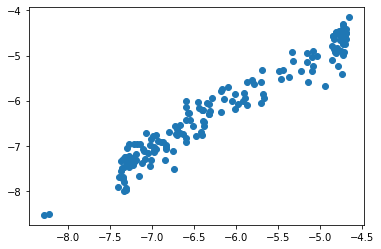

In [71]:
import matplotlib.pyplot as plt

plt.scatter(mdl.predict(X), y)

In [72]:
import joblib

joblib.dump(imputer, "../checkpoints/imputer.joblib")
joblib.dump(scaler, "../checkpoints/scaler.joblib")
joblib.dump(mdl, "../checkpoints/flaml.joblib")

['../checkpoints/flaml.joblib']